In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [1]:
import os
import numpy as np
from PIL import Image  

train_path = "C:\\Users\\Mariam Yasser\\Desktop\\STL10_Project\\train_images"
test_path = "C:\\Users\\Mariam Yasser\\Desktop\\STL10_Project\\test_images"



def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)  
        img = img.resize((96, 96))  
        images.append(np.array(img))  # COVERT IMG TO ARR
    return np.array(images)

X_train = load_images_from_folder(train_path)
X_test = load_images_from_folder(test_path)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (5000, 96, 96, 3)
Test data shape: (8000, 96, 96, 3)


In [4]:
from tensorflow.keras import layers, models

#Building an Autoencoder Model
input_img = layers.Input(shape=(96, 96, 3))  

# (Encoder)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# (Decoder)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

# (Output)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Assemble the model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 96, 96, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 96, 96, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 96, 96, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))
#train the model to reconstruct the input data

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 582ms/step - loss: 0.0490 - val_loss: 0.0136
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 563ms/step - loss: 0.0126 - val_loss: 0.0103
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 585ms/step - loss: 0.0096 - val_loss: 0.0080
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 609ms/step - loss: 0.0077 - val_loss: 0.0116
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 563ms/step - loss: 0.0082 - val_loss: 0.0067
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 560ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 580ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 559ms/step - loss: 0.0058 - val_loss: 0.0066
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 579ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 614ms/step - loss: 0.0054 - val_loss: 0.0054


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


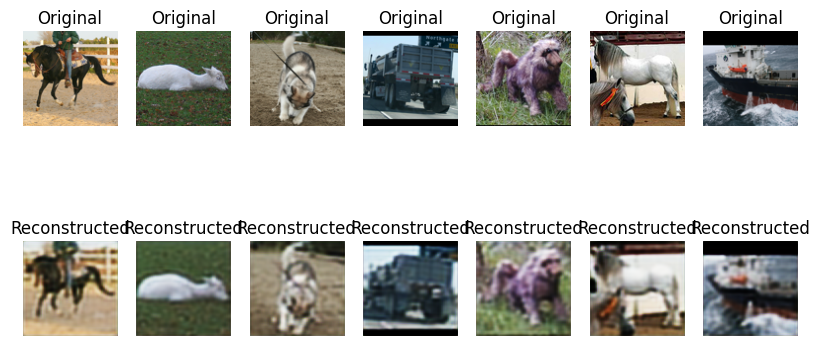

In [7]:
import matplotlib.pyplot as plt

num_images = 7
plt.figure(figsize=(10, 5))
for i in range(num_images):

# Show original image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis('off')
    
# Show reconstructed image
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(autoencoder.predict(X_test[i:i+1])[0])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()
